<a href="https://colab.research.google.com/github/MohammedZain2005/Customer-Churn-Prediction-and-Analysis/blob/main/Churn_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                   RobustScaler,
                                   LabelEncoder,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import ( cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV,
                                     StratifiedKFold,
                                    RandomizedSearchCV)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline , make_pipeline
from scipy.stats import randint
from scipy import stats
from sklearn.impute import SimpleImputer
# Load the dataset
df = pd.read_csv('/content/archive (2).zip')

# Quick look
print(df.shape)
print(df.info())
df.head()


(36275, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arr

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


**Encoding**

In [ ]:
num_cols = df.select_dtypes(include=['number'])\
                .columns.difference(['Booking_ID']).tolist()
cat_cols = df.select_dtypes(include=['object', 'category'])\
                .columns.difference(['Booking_ID']).tolist()


In [ ]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':\n{unique_values}\n")

In [ ]:
show_unique_values(df[cat_cols])

Unique values in 'booking_status':
['Not_Canceled' 'Canceled']

Unique values in 'market_segment_type':
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

Unique values in 'room_type_reserved':
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Unique values in 'type_of_meal_plan':
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']



In [ ]:
def unique_counts(df):
    num_unique = df.nunique().sort_values(ascending=False)
    pct_unique = ((df.nunique().sort_values(ascending=False) / len(df)) * 100).round(3)
    pct_unique = pct_unique.astype(str) + '%'

    unique = pd.DataFrame({
        'Unique Count': num_unique,
        'Percentage Unique': pct_unique
    })

    return unique

In [ ]:
unique_counts(df)

,Unique Count,Percentage Unique
Booking_ID,36275,100.0%
avg_price_per_room,3930,10.834%
lead_time,352,0.97%
no_of_previous_bookings_not_canceled,59,0.163%
arrival_date,31,0.085%
no_of_week_nights,18,0.05%
arrival_month,12,0.033%
no_of_previous_cancellations,9,0.025%
no_of_weekend_nights,8,0.022%
room_type_reserved,7,0.019%


we need to drop Booking_ID




In [ ]:
df.drop('Booking_ID', axis = 1, inplace = True)

need to check if there is a missing value

In [ ]:
def calculate_missing_data(df):

    missing_ratio = (df.isnull().sum() / len(df)) * 100

    missing_data = missing_ratio[missing_ratio > 0]

    missing_data_df = pd.DataFrame({'Missing Ratio %': missing_data}).sort_values('Missing Ratio %', ascending=False)

    return missing_data_df


calculate_missing_data(df)

,Missing Ratio %


In [ ]:
df.duplicated().sum()

np.int64(10275)

split the data

In [ ]:
X = df.drop('booking_status',axis=1)
y = df[['booking_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [ ]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9078,2,0,1,2,Meal Plan 1,0,Room_Type 1,273,2018,5,13,Offline,0,0,0,95.00,0,Canceled
36042,2,0,1,3,Meal Plan 1,0,Room_Type 1,158,2018,6,30,Online,0,0,0,90.95,1,Canceled
5929,2,0,2,1,Meal Plan 1,0,Room_Type 1,59,2018,11,26,Online,0,0,0,93.60,1,Not_Canceled
6928,1,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,10,25,Aviation,0,0,0,95.00,0,Not_Canceled
34607,2,2,2,4,Meal Plan 1,0,Room_Type 6,54,2018,4,29,Online,0,0,0,187.85,0,Canceled


Removing the multi-collinearity from the data

In [ ]:
!pip install statsmodels
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

def label_encode_dataframe(df):
    """
    Label encodes all categorical columns in the dataframe.
    """
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in df_encoded.select_dtypes(include='object'):
        df_encoded[col] = le.fit_transform(df_encoded[col])
    return df_encoded

def drop_high_vif_features(X, vif_threshold=10):
    """
    Iteratively removes features with high VIF until all VIFs are below the threshold.

    Parameters:
    - X: pandas DataFrame with only numeric features
    - vif_threshold: float, threshold for VIF

    Returns:
    - X_cleaned: DataFrame after removing high-VIF features
    - dropped_features: List of features removed
    """
    X_cleaned = X.copy()
    dropped_features = []

    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X_cleaned.columns
        vif_data["VIF"] = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]

        max_vif = vif_data["VIF"].max()
        if max_vif > vif_threshold:
            feature_to_drop = vif_data.sort_values(by="VIF", ascending=False)["Feature"].iloc[0]
            print(f"Dropping '{feature_to_drop}' with VIF = {max_vif:.2f}")
            dropped_features.append(feature_to_drop)
            X_cleaned = X_cleaned.drop(columns=[feature_to_drop])
        else:
            break

    return X_cleaned, dropped_features


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.7 MB/s eta 0:00:00


In [ ]:
df_encoded = label_encode_dataframe(df)

#Drop Target Column for VIF check
X = df_encoded.drop(columns=['booking_status'])  # Target column
y = df_encoded['booking_status']

#Remove Multicollinearity
X_cleaned, dropped_features = drop_high_vif_features(X, vif_threshold=30)

print("Final feature set after VIF filtering:")
print(X_cleaned.columns.tolist())

Dropping 'arrival_year' with VIF = 53.20
Final feature set after VIF filtering:
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


skewness

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numeric columns (excluding the target)
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('booking_status')

# Check skewness
skew_vals = df_encoded[numeric_cols].skew().sort_values(ascending=False)
print("\nSkewed features (skew > 1):")
print(skew_vals[skew_vals > 1])

# Apply log1p transformation to correct skewness
for col in skew_vals[skew_vals > 1].index:
    df_encoded[col] = np.log1p(df_encoded[col])
    print(f"Log-transformed '{col}'")



Skewed features (skew > 1):
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
repeated_guest                           6.002888
required_car_parking_space               5.413643
no_of_children                           4.710350
type_of_meal_plan                        1.801398
room_type_reserved                       1.729018
no_of_week_nights                        1.599350
lead_time                                1.292492
no_of_special_requests                   1.145081
dtype: float64
Log-transformed 'no_of_previous_cancellations'
Log-transformed 'no_of_previous_bookings_not_canceled'
Log-transformed 'repeated_guest'
Log-transformed 'required_car_parking_space'
Log-transformed 'no_of_children'
Log-transformed 'type_of_meal_plan'
Log-transformed 'room_type_reserved'
Log-transformed 'no_of_week_nights'
Log-transformed 'lead_time'
Log-transformed 'no_of_special_requests'


In [ ]:
# Recheck skewness after log1p transformation
updated_skew = df_encoded[numeric_cols].skew().sort_values(ascending=False)

print("\n✅ Skewness after log transformation:")
print(updated_skew)

# Optional: Only print those still above threshold
print("\n⚠️ Still skewed after log (skew > 1):")
print(updated_skew[updated_skew > 1])



✅ Skewness after log transformation:
no_of_previous_cancellations            14.568081
no_of_previous_bookings_not_canceled     8.921569
repeated_guest                           6.002888
required_car_parking_space               5.413643
no_of_children                           3.614467
type_of_meal_plan                        1.586995
room_type_reserved                       1.452107
no_of_weekend_nights                     0.737616
avg_price_per_room                       0.667133
no_of_special_requests                   0.566321
arrival_date                             0.028809
no_of_adults                            -0.333295
arrival_month                           -0.348229
no_of_week_nights                       -0.424775
lead_time                               -0.826045
arrival_year                            -1.669695
market_segment_type                     -1.684871
dtype: float64

⚠️ Still skewed after log (skew > 1):
no_of_previous_cancellations            14.568081
no_of_pr

In [ ]:
df_encoded['no_of_previous_cancellations'] = np.sqrt(df_encoded['no_of_previous_cancellations'])
df_encoded['no_of_previous_bookings_not_canceled'] = np.sqrt(df_encoded['no_of_previous_bookings_not_canceled'])


In [ ]:
#Re-check skewness (only for numeric columns and after dropping target if needed)
numeric_cols_after = df_encoded.select_dtypes(include=['int64', 'float64']).columns
numeric_cols_after = numeric_cols_after.drop('Booking_Status') if 'Booking_Status' in numeric_cols_after else numeric_cols_after

# Calculate and sort skewness
final_skew = df_encoded[numeric_cols_after].skew().sort_values(ascending=False)

print("\n✅ Skewness after all transformations:")
print(final_skew)

print("\n⚠️ Still skewed after all fixes (skew > 1):")
print(final_skew[final_skew > 1])


✅ Skewness after all transformations:
no_of_previous_cancellations            11.180110
no_of_previous_bookings_not_canceled     7.174834
repeated_guest                           6.002888
required_car_parking_space               5.413643
no_of_children                           3.614467
type_of_meal_plan                        1.586995
room_type_reserved                       1.452107
no_of_weekend_nights                     0.737616
avg_price_per_room                       0.667133
no_of_special_requests                   0.566321
arrival_date                             0.028809
no_of_adults                            -0.333295
arrival_month                           -0.348229
no_of_week_nights                       -0.424775
booking_status                          -0.734507
lead_time                               -0.826045
arrival_year                            -1.669695
market_segment_type                     -1.684871
dtype: float64

⚠️ Still skewed after all fixes (skew > 1):
n

correlation

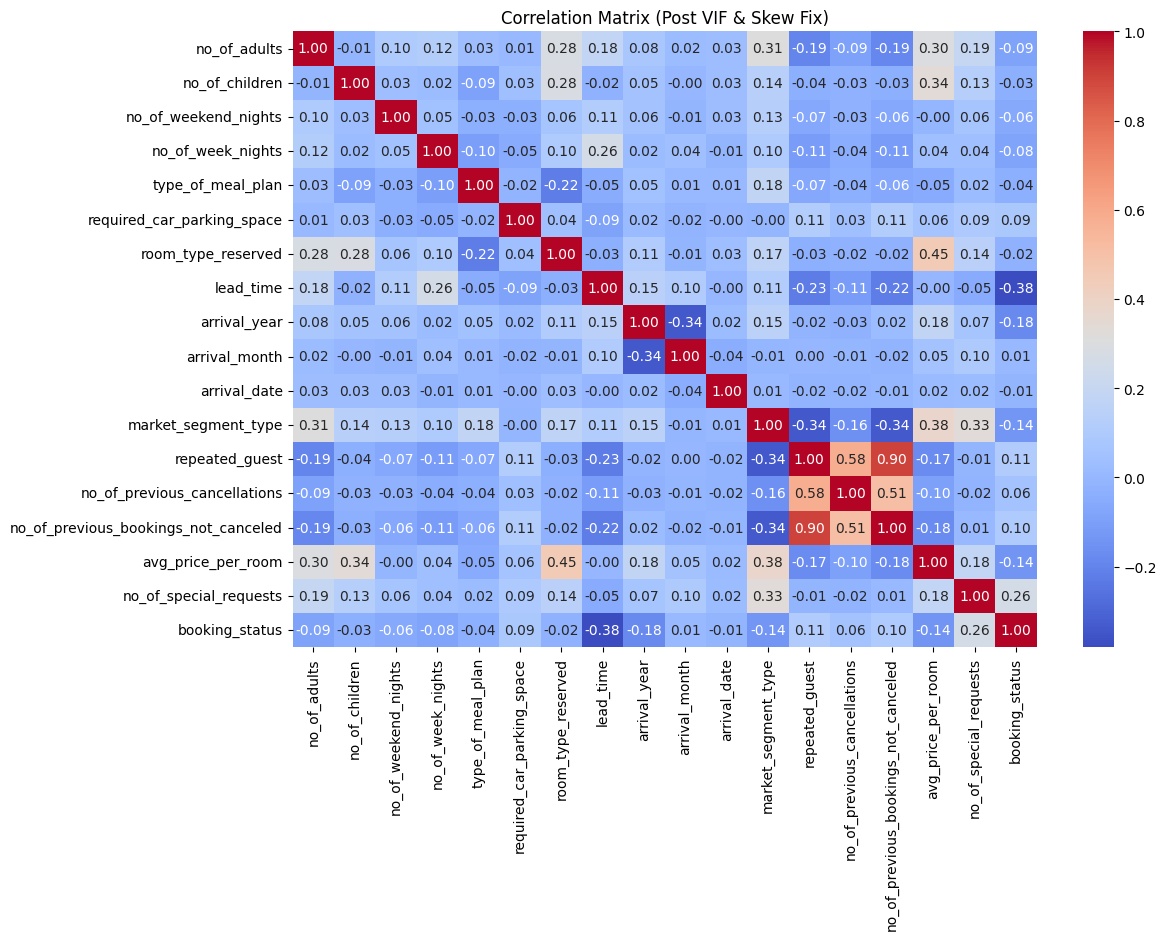

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Post VIF & Skew Fix)")
plt.show()


Feature Engineering (based on domain knowledge)

In [ ]:
# total number of people
df_encoded['total_people'] = df_encoded['no_of_adults'] + df_encoded['no_of_children']

# stay length
df_encoded['stay_length'] = df_encoded['no_of_weekend_nights'] + df_encoded['no_of_week_nights']

# total estimated price (can help predict cancellations)
df_encoded['total_price'] = df_encoded['avg_price_per_room'] * df_encoded['stay_length']

# Optional drop original columns used in new features
df_encoded.drop(columns=[
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights'
], inplace=True)


In [ ]:
print("\nFinal cleaned & engineered dataset:")
print(df_encoded.head())



Final cleaned & engineered dataset:
   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0           0.000000                         0.0                 0.0   
1           1.386294                         0.0                 0.0   
2           0.000000                         0.0                 0.0   
3           0.000000                         0.0                 0.0   
4           1.386294                         0.0                 0.0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0   5.416100          2017             10             2                    3   
1   1.791759          2018             11             6                    4   
2   0.693147          2018              2            28                    4   
3   5.356586          2018              5            20                    4   
4   3.891820          2018              4            11                    4   

   repeated_guest  no_of_previous_cancellations  


pipline




In [ ]:
class ColumnSelector(TransformerMixin, BaseEstimator):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None): return self

    def transform(self, X, y=None): return X[self.columns]


In [ ]:
class Transformation(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, skew_threshold=1):

        self.cols = cols
        self.skew_threshold = skew_threshold
        self.skewed_columns = []

    def fit(self, X, y=None):

        if self.cols is None:
            self.cols = X.select_dtypes(include=[np.number]).columns

        self.skewed_columns = [
            col for col in self.cols if abs(X[col].skew()) > self.skew_threshold
        ]
        return self

    def transform(self, X):

        X_copy = X.copy()
        for col in self.skewed_columns:
            # Apply log transformation
            X_copy[col] = np.log1p(X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):

        return self.fit(X, y).transform(X)

In [ ]:
class ScalingTransform(BaseEstimator, TransformerMixin):

    def __init__(self, cols, scaling_method):
        self.cols = cols
        self.scaler_ = None
        self.scaling_method = scaling_method

    def fit(self, X, y=None):
        if self.scaling_method == "std_scale":
            self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        elif self.scaling_method == "min_max_scale":
            self.scaler_ = MinMaxScaler().fit(X.loc[:, self.cols])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [ ]:
class OneHotEncodeColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cols):

        self.cols = cols
        self.encoder = None
        self.column_names = None

    def fit(self, X, y=None):

        self.encoder = OneHotEncoder(sparse_output=False, drop='first')
        self.encoder.fit(X[self.cols])
        self.column_names = self.encoder.get_feature_names_out(self.cols)
        return self

    def transform(self, X):

        X_copy = X.copy()


        encoded_data = self.encoder.transform(X_copy[self.cols])
        encoded_df = pd.DataFrame(encoded_data, columns=self.column_names, index=X_copy.index)


        X_copy = X_copy.drop(columns=self.cols)
        X_copy = pd.concat([X_copy, encoded_df], axis=1)

        return X_copy

    def fit_transform(self, X, y=None):

        self.fit(X, y)
        return self.transform(X)

In [ ]:
class LabelEncodeColumns(BaseEstimator, TransformerMixin):

    def __init__(self, cols):
        self.cols = cols
        self.encoders_ = {}

    def fit(self, X, y=None):
        for col in self.cols:
            encoder = LabelEncoder()
            encoder.fit(X[col])
            self.encoders_[col] = encoder
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col, encoder in self.encoders_.items():
            X_copy[col] = encoder.transform(X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [ ]:
class OrdinalEncodeColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cols, categories=None):

        self.cols = cols
        self.categories = categories
        self.encoder = None

    def fit(self, X, y=None):

        self.encoder = OrdinalEncoder(categories=self.categories)
        self.encoder.fit(X[self.cols])
        return self

    def transform(self, X):

        X_copy = X.copy()


        encoded_data = self.encoder.transform(X_copy[self.cols])


        encoded_df = pd.DataFrame(encoded_data, columns=self.cols, index=X_copy.index)


        X_copy = X_copy.drop(columns=self.cols)
        X_copy = pd.concat([X_copy, encoded_df], axis=1)

        return X_copy

    def fit_transform(self, X, y=None):

        self.fit(X, y)
        return self.transform(X)

In [ ]:
class DropColumnsTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, cols=None):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.cols is None:
            return X
        else:
            return X.drop(self.cols,axis=1)

In [ ]:
class QuarterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column='arrival_month'):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Ensure arrival_month is integer
        X[self.column] = X[self.column].astype(int)

        # Define quarters
        conditions = [
            (X[self.column] <= 3),
            (X[self.column] > 3) & (X[self.column] <= 6),
            (X[self.column] > 6) & (X[self.column] <= 9),
            (X[self.column] >= 10)
        ]
        values = ['Q1', 'Q2', 'Q3', 'Q4']  # All strings

        # Apply safely with same dtype
        X['quarter'] = np.select(conditions, values, default='Q1')  # default must be string
        return X


In [ ]:
class FullPipeline1:
    def __init__(self):
        self.all_cols = df.drop('booking_status', axis=1).columns

        self.drop_cols = ['arrival_year','arrival_date','room_type_reserved_Room_Type 2','room_type_reserved_Room_Type 3','type_of_meal_plan_Not Selected','type_of_meal_plan_Meal Plan 3',
                 'arrival_month','room_type_reserved_Room_Type 5']

        self.one_hot_encode_cols = ['market_segment_type','type_of_meal_plan', 'room_type_reserved','quarter']

        self.label_encode = ['booking_status']
        self.scale_cols = num_cols

        self.full_pipeline = Pipeline([
            ('selector', ColumnSelector(columns=self.all_cols)),

            ('quarter_transform', QuarterTransformer(column='arrival_month')),
            ('power_transformation', Transformation(cols=num_cols)),
            ('one_hot_encode', OneHotEncodeColumns(cols=self.one_hot_encode_cols)),

            ('scaling', ScalingTransform(cols=self.scale_cols,
                                         scaling_method="min_max_scale")),
            ('drop_cols', DropColumnsTransformer(cols=self.drop_cols))
        ])

        self.y_pipeline = Pipeline([
            ('selector', ColumnSelector(columns=['booking_status'])),

            ('label_encode', LabelEncodeColumns(cols=self.label_encode))
        ])

    def fit_transform(self, X_train, y_train):
        X_train = self.full_pipeline.fit_transform(X_train)
        y_train = self.y_pipeline.fit_transform(y_train)
        return X_train, y_train

    def transform(self, X_test, y_test):
        X_test = self.full_pipeline.transform(X_test)
        y_test = self.y_pipeline.transform(y_test)
        return X_test, y_test

In [ ]:
full_pipeline1 = FullPipeline1()
X_train1, y_train1 = full_pipeline1.fit_transform(X_train, y_train)
X_test1, y_test1 = full_pipeline1.transform(X_test, y_test)

<ipython-input-25-3cf3a3e95fd1>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.4        0.96666667 0.83333333 ... 0.         0.53333333 0.4       ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
<ipython-input-25-3cf3a3e95fd1>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.36363636 0.45454545 0.90909091 ... 0.81818182 0.54545455 0.36363636]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
<ipython-input-25-3cf3a3e95fd1>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.5  0.5  0.5  ... 0.5  0.25 0.5 ]' has dtype incompatible wi

In [ ]:
X_combined = np.concatenate([X_train1, X_test1], axis=0)

y = np.concatenate([y_train1, y_test1], axis=0)
X = pd.DataFrame(X_combined, columns=X_train1.columns)

<ipython-input-34-e44e15c94805>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(X.columns)


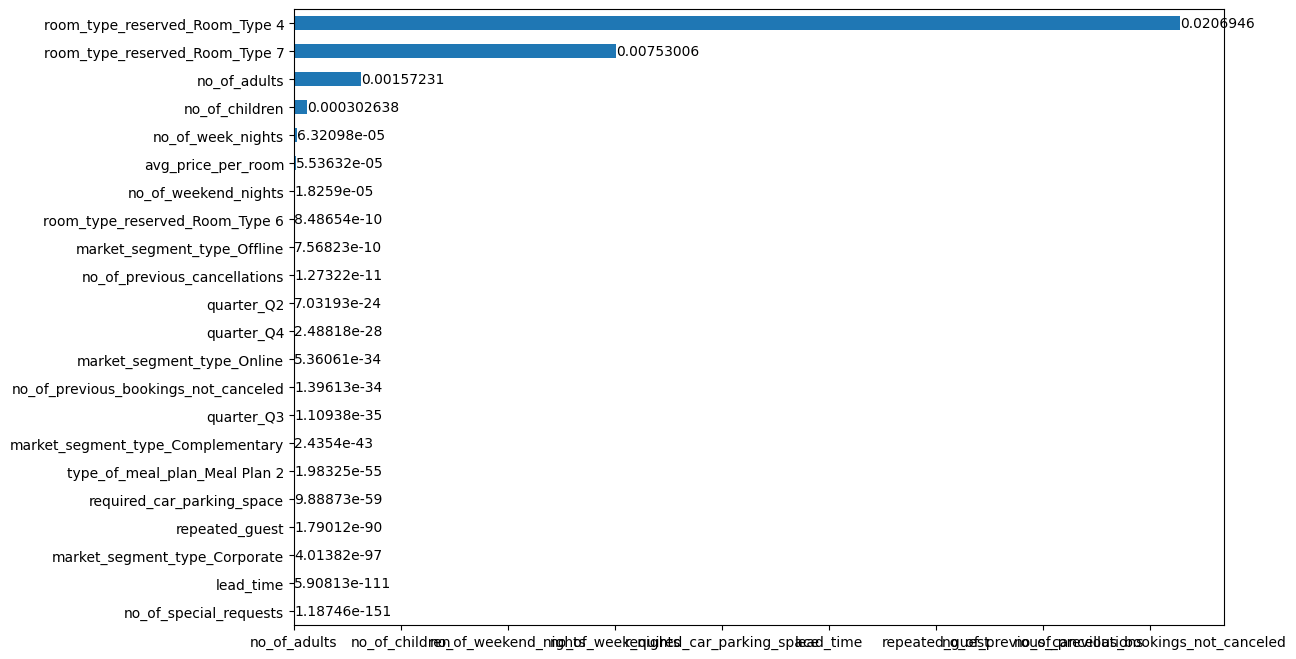

In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
plt.figure(figsize=(12, 8))
fig = p_values.plot(kind='barh')
fig.set_xticklabels(X.columns)
fig.bar_label(fig.containers[0], label_type='edge')
plt.show()

Over Sampling

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.2, stratify=over_y, random_state = 42)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
def baseline_cls(X_train, y_train, X_test, y_test):


    base = DummyClassifier()
    base.fit(X_train, y_train)


    y_pred_base = base.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred_base)
    f1 = f1_score(y_test, y_pred_base)
    roc_auc = roc_auc_score(y_test, y_pred_base)


    print(f"Your baseline model achieves accuracy = {accuracy}")
    print(f"Your baseline model achieves F1 score = {f1}")
    print(f"Your baseline model achieves ROC AUC = {roc_auc}")

In [ ]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier  # XGBoost must be installed separately

models = [
    LogisticRegression(random_state=ord("S")),
    DecisionTreeClassifier(random_state=ord("S")),
    RandomForestClassifier(random_state=ord("S")),
    ExtraTreesClassifier(random_state=ord("S")),
    GradientBoostingClassifier(random_state=ord("S")),
    XGBClassifier(random_state=ord("S"), use_label_encoder=False, eval_metric='logloss'),
    AdaBoostClassifier(random_state=ord("S")),
    BaggingClassifier(random_state=ord("S")),
    KNeighborsClassifier(),
    GaussianNB(),

]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


In [ ]:
def evaluate_models_cls(models, over_X_train, over_y_train, over_X_test, over_y_test, cv):
    results = []

    for model in models:
        start = time.time()


        cv_results = cross_validate(model, over_X_train, over_y_train, cv=cv,
                                    scoring=['accuracy', 'roc_auc', 'f1'], return_train_score=True)


        train_mean_accuracy = np.mean(cv_results['train_accuracy'])
        train_mean_roc_auc = np.mean(cv_results['train_roc_auc'])
        train_mean_f1 = np.mean(cv_results['train_f1'])


        model.fit(over_X_train, over_y_train)
        test_preds = model.predict(X_test)

        test_accuracy = accuracy_score(y_test, test_preds)
        test_roc_auc = roc_auc_score(y_test, test_preds)
        test_f1 = f1_score(y_test, test_preds)

        # Store results
        results_dict = {
            'model': model.__class__.__name__,
            'train_accuracy': train_mean_accuracy,
            'test_accuracy': test_accuracy,
            'train_f1': train_mean_f1,
            'test_f1': test_f1,
            'train_roc_auc': train_mean_roc_auc,
            'test_roc_auc': test_roc_auc,
            'time': time.time() - start
        }
        results.append(results_dict)


    results_df = pd.DataFrame(results)


    results_df.set_index('model', inplace=True)
    results_df = results_df.sort_values(by='test_accuracy', ascending=False)

    return results_df


In [ ]:
import time
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

results_df = evaluate_models_cls(models,over_X_train, over_y_train, over_X_test, over_y_test, cv=5)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:39:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:39:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:39:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:39:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:39:35] WARNING: /w

In [ ]:
results_df

,train_accuracy,test_accuracy,train_f1,test_f1,train_roc_auc,test_roc_auc,time
model,,,,,,,
RandomForestClassifier,0.994151,0.973398,0.994155,0.979990,0.999520,0.971079,22.354967
ExtraTreesClassifier,0.994157,0.971744,0.994152,0.978657,0.999909,0.971277,23.048227
DecisionTreeClassifier,0.994157,0.968573,0.994152,0.976304,0.999909,0.966840,1.024446
BaggingClassifier,0.987040,0.963611,0.987002,0.972466,0.999015,0.963011,5.703960
XGBClassifier,0.904994,0.890283,0.906239,0.916997,0.972122,0.880493,1.366338
KNeighborsClassifier,0.900670,0.883253,0.898486,0.908856,0.971865,0.887870,22.910290
GradientBoostingClassifier,0.830745,0.825913,0.833194,0.863974,0.916698,0.823836,19.831508
AdaBoostClassifier,0.775568,0.766919,0.775153,0.814115,0.862117,0.767203,5.520272
LogisticRegression,0.770795,0.755755,0.766196,0.801301,0.854640,0.763862,52.789714


In [ ]:
import joblib
# Instantiate and fit RandomForestClassifier
model = RandomForestClassifier(random_state=ord('S'))
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

print("✅ RandomForestClassifier model saved successfully as 'random_forest_model.pkl'.")

from huggingface_hub import HfApi, create_repo

# Initialize API
api = HfApi()

token = getpass.getpass("Enter Hugging Face Token")

# Create a new repository (if it doesn’t exist)
repo_name = "georgtawadrous/HotelBookingStatusPredictor"  # Replace with your username and desired repo name
create_repo(repo_id=repo_name, token=token, repo_type="model", exist_ok=True)

# Upload the .pkl file
local_file_path = "random_forest_model.pkl"  # Path to your .pkl file
api.upload_file(
    path_or_fileobj=local_file_path,
    path_in_repo="random_forest_model.pkl",  # Destination path in repo
    repo_id=repo_name,
    repo_type="model",
    token=token
)
print(f"Uploaded {local_file_path} to {repo_name}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


✅ RandomForestClassifier model saved successfully as 'random_forest_model.pkl'.


In [ ]:
import mlflow
import subprocess
from pyngrok import ngrok, notification
import schedule
import time
import numpy as np
import pandas as pd
import logging
import datetime
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, train_test_split
from email.mime.text import MIMEText
import smtplib
import os
import json
from IPython.display import display, clear_output
import requests
import getpass

# Setup logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

# Define the MLflow tracking URI with SQLite
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"

# --------- NGROK SETUP WITH INPUT ---------
def setup_ngrok():
    try:
        # Authenticating with ngrok - ensure you have the correct auth token
        print("\nTo set up ngrok, enter your valid authtoken from https://dashboard.ngrok.com/auth")

        auth_token = os.environ.get("NGROK_AUTH_TOKEN")  # Check if it's set as an environment variable
        if not auth_token:
            auth_token = getpass.getpass("Ngrok authtoken (hidden input): ")

        # Set the token (no '1t' check to support newer tokens)
        conf.get_default().auth_token = auth_token

        # Start ngrok process to expose the MLflow UI on port 5000
        port = 5000
        public_url = ngrok.connect(port).public_url
        logging.info(f"Ngrok tunnel created: {public_url} -> http://127.0.0.1:{port}")
        print(f"\n✅ NGROK SETUP SUCCESSFUL: MLflow UI available at: {public_url}\n")
        return public_url
    except Exception as e:
        logging.error(f"Failed to set up ngrok: {e}")
        print(f"\n⚠️ NGROK SETUP FAILED: {str(e)}")
        print("MLflow UI will only be available locally at http://localhost:5000\n")
        return None

# Make sure any existing runs are ended before starting
def ensure_no_active_runs():
    try:
        mlflow.end_run()
        logging.info("Ended any existing MLflow runs")
    except Exception:
        # No active run to end
        pass

# Initialize MLflow server (if not already running)
def start_mlflow_server():
    try:
        # Check if server is already running
        response = requests.get("http://localhost:5000")
        logging.info("MLflow server is already running")
    except:
        logging.info("Starting MLflow server...")
        subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI, "--port", "5000"])
        time.sleep(5)  # Give server time to start
        print("MLflow server started - UI available at http://localhost:5000")

# First start MLflow server
start_mlflow_server()

# Set up ngrok for public access
public_url = setup_ngrok()

# -------- ALERT FUNCTION WITH PROTONMAIL SMTP ----------
def alert_admin(message, email_recipients=None):
    # Always log the alert
    logging.warning(message)

    # Send email alert if recipients are provided
    if email_recipients:
        try:
            # Using ProtonMail as the email provider
            sender = "HotelReservationCancellationPrediction@proton.me"
            sender_password = os.environ.get("EMAIL_APP_PASSWORD")
            if not sender_password:
                sender_password = getpass.getpass("ProtonMail password for {} (hidden input): ".format(sender))

            msg = MIMEText(message)
            msg["Subject"] = "ML Model Monitoring Alert"
            msg["From"] = sender
            msg["To"] = ", ".join(email_recipients)

            # ProtonMail SMTP connection
            with smtplib.SMTP("smtp.protonmail.com", 587) as server:
                server.starttls()
                server.login(sender, sender_password)
                server.sendmail(sender, email_recipients, msg.as_string())

            logging.info(f"Alert email sent to {email_recipients}")
            return True
        except Exception as e:
            logging.error(f"Failed to send email alert: {e}")
            return False

# --------- Model Evaluation Function ---------
def evaluate_models_cls(models, over_X_train, over_y_train, over_X_test, over_y_test, cv):
    results = []
    for model in models:
        start = time.time()

        # Make sure there's no active run
        ensure_no_active_runs()

        with mlflow.start_run():
            model_name = model.__class__.__name__
            logging.info(f"Evaluating {model_name}...")

            # Log model name and time
            mlflow.log_param("model_name", model_name)
            mlflow.log_param("execution_timestamp", datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

            # Cross validation
            cv_results = cross_validate(model, over_X_train, over_y_train, cv=cv,
                                        scoring=['accuracy', 'roc_auc', 'f1'], return_train_score=True)
            train_mean_accuracy = np.mean(cv_results['train_accuracy'])
            train_mean_roc_auc = np.mean(cv_results['train_roc_auc'])
            train_mean_f1 = np.mean(cv_results['train_f1'])

            # Fit and evaluate
            model.fit(over_X_train, over_y_train)
            test_preds = model.predict(over_X_test)
            test_accuracy = accuracy_score(over_y_test, test_preds)
            test_roc_auc = roc_auc_score(over_y_test, test_preds)
            test_f1 = f1_score(over_y_test, test_preds)

            # Log metrics
            mlflow.log_metric("test_accuracy", test_accuracy)
            mlflow.log_metric("test_f1_score", test_f1)
            mlflow.log_metric("test_roc_auc", test_roc_auc)
            mlflow.log_metric("train_accuracy", train_mean_accuracy)
            mlflow.log_metric("train_roc_auc", train_mean_roc_auc)
            mlflow.log_metric("train_f1", train_mean_f1)

            # Prepare results
            results_dict = {
                'model': model_name,
                'train_accuracy': train_mean_accuracy,
                'test_accuracy': test_accuracy,
                'train_f1': train_mean_f1,
                'test_f1': test_f1,
                'train_roc_auc': train_mean_roc_auc,
                'test_roc_auc': test_roc_auc,
                'time': time.time() - start
            }
            results.append(results_dict)
            logging.info(f"Run logged successfully for model: {model_name}")

        # End run explicitly to ensure it's closed
        ensure_no_active_runs()

    results_df = pd.DataFrame(results)
    results_df.set_index('model', inplace=True)
    results_df = results_df.sort_values(by='test_accuracy', ascending=False)
    return results_df

# --------- Fetch Historical Accuracy from MLflow ---------
def get_historical_data():
    # Make sure there's no active run
    ensure_no_active_runs()

    experiment_name = "Hotel Reservation Cancellation Prediction"
    mlflow.set_experiment(experiment_name)
    experiment = mlflow.get_experiment_by_name(experiment_name)

    if experiment is not None:
        experiment_id = experiment.experiment_id
        runs = mlflow.search_runs(experiment_ids=[experiment_id])
        historical_accuracy = []
        for _, run in runs.iterrows():
            if "metrics.test_accuracy" in run and not pd.isna(run["metrics.test_accuracy"]):
                historical_accuracy.append(float(run["metrics.test_accuracy"]))
        if historical_accuracy:
            threshold = 0.02 * np.mean(historical_accuracy)  # 2% of mean acc as threshold
            logging.info(f"Historical Accuracies: {historical_accuracy}")
            logging.info(f"Dynamic Drift Threshold: {threshold:.4f}")
        else:
            threshold = 0.02  # fallback
            logging.info("No historical accuracy found, using default threshold 0.02.")
    else:
        historical_accuracy = []
        threshold = 0.02
        logging.info("Experiment not found. Using default values.")

    return historical_accuracy, threshold

# --------- Drift Check Function ---------
def check_drift(current_accuracy, historical_accuracies, threshold):
    if not historical_accuracies:
        return False
    historical_mean = np.mean(historical_accuracies)
    if (historical_mean - current_accuracy) > threshold:
        return True
    return False

# --------- User Interaction Change Function (mean shift example) ---------
def detect_significant_input_change(current_data, historical_means, threshold=0.25):
    current_means = np.mean(current_data, axis=0)
    ratio = np.abs(current_means - historical_means) / (np.abs(historical_means) + 1e-6)
    return np.any(ratio > threshold)  # True if any feature mean drifts > threshold (25% default)

# --------- MONITORING FUNCTION ---------
def run_monitoring():
    """Main function that runs the monitoring pipeline"""
    # Make sure there's no active run from previous execution
    ensure_no_active_runs()

    try:
        # Log execution
        execution_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        logging.info(f"Running monitoring at {execution_time}")

        # Get historical data
        historical_accuracy, threshold = get_historical_data()

        # Generate or load new data
        # In a real scenario, you'd load your actual production data here
        X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                                n_informative=8, random_state=int(time.time()) % 1000)  # Random seed for variety
        over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Save historical feature means
        historical_feature_means = np.mean(over_X_train, axis=0)

        # Define models
        models = [
            LogisticRegression(max_iter=500),
            RandomForestClassifier(n_estimators=100)
        ]

        # Create a run directory to save artifacts
        run_dir = f"monitoring_run_{execution_time.replace(':', '-').replace(' ', '_')}"
        os.makedirs(run_dir, exist_ok=True)

        # Start an MLflow run for this monitoring session
        with mlflow.start_run(run_name=f"monitoring_{execution_time}"):
            # Log basic run info
            mlflow.log_param("execution_time", execution_time)
            mlflow.log_param("data_size", len(X))

            # Log drift thresholds
            mlflow.log_param("accuracy_drift_threshold", threshold)
            mlflow.log_param("feature_drift_threshold", 0.25)

            # Run model evaluation (will create its own nested runs)
            results_df = evaluate_models_cls(
                models, over_X_train, over_y_train, over_X_test, over_y_test, cv=5
            )

            # Save results to file
            results_file = f"{run_dir}/results.csv"
            results_df.to_csv(results_file)
            mlflow.log_artifact(results_file)

            # Check for performance drift
            drift_detected = False
            for model_name, row in results_df.iterrows():
                curr_acc = row['test_accuracy']
                model_drift = check_drift(curr_acc, historical_accuracy, threshold)
                mlflow.log_metric(f"{model_name}_drift_detected", int(model_drift))

                if model_drift:
                    drift_detected = True
                    message = f"Warning: Performance drift detected for {model_name}! Current test accuracy: {curr_acc:.3f}"
                    email_sent = alert_admin(
                        message,
                        email_recipients=["georgtawadrous@gmail.com"]
                    )
                    mlflow.log_param(f"{model_name}_alert_sent", str(email_sent))
                    mlflow.log_param(f"{model_name}_alert_message", message)
                else:
                    logging.info(f"Model performance is stable for {model_name}.")

            # Check for user interaction/input drift
            current_data = over_X_test
            input_drift = detect_significant_input_change(current_data, historical_feature_means)
            mlflow.log_metric("input_drift_detected", int(input_drift))

            if input_drift:
                message = "Significant change detected in user input patterns! Please investigate."
                email_sent = alert_admin(
                    message,
                    email_recipients=["georgtawadrous@gmail.com"]
                )
                mlflow.log_param("input_alert_sent", str(email_sent))
                mlflow.log_param("input_alert_message", message)
            else:
                logging.info("No significant change in user input patterns.")

            # Save drift status to file
            drift_status = {
                "execution_time": execution_time,
                "models": {model: int(check_drift(row['test_accuracy'], historical_accuracy, threshold))
                          for model, row in results_df.iterrows()},
                "input_drift": int(input_drift),
                "alert_sent": int(drift_detected or input_drift)
            }

            with open(f"{run_dir}/drift_status.json", "w") as f:
                json.dump(drift_status, f)
            mlflow.log_artifact(f"{run_dir}/drift_status.json")

        # Ensure run is ended
        ensure_no_active_runs()

        # Display current results
        clear_output(wait=True)
        display(pd.DataFrame({
            "Execution Time": [execution_time],
            "Models Evaluated": [len(models)],
            "Performance Drift Detected": [drift_detected],
            "Input Drift Detected": [input_drift]
        }))
        display(results_df)

        return results_df, drift_detected, input_drift

    except Exception as e:
        error_msg = f"Error in monitoring run: {str(e)}"
        logging.error(error_msg, exc_info=True)
        alert_admin(
            error_msg,
            email_recipients=["georgtawadrous@gmail.com"]
        )

        # Ensure run is ended even if there's an error
        ensure_no_active_runs()

        return None, False, False

# --------- SCHEDULER FUNCTION ---------
def start_automated_monitoring(interval_minutes=60, run_immediately=True):
    """Start automated monitoring on a schedule"""
    # Make sure no runs are active
    ensure_no_active_runs()

    # Setting up MLflow tracking
    mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)  # Fixed syntax
    mlflow.set_experiment("Hotel Reservation Cancellation Prediction")

    # Schedule the monitoring run
    schedule.every(interval_minutes).minutes.do(run_monitoring)
    logging.info(f"Automated monitoring scheduled to run every {interval_minutes} minutes")

    # Run immediately if requested
    if run_immediately:
        logging.info("Running initial monitoring")
        run_monitoring()

    # Keep the scheduler running
    try:
        run_count = 0
        while True:
            schedule.run_pending()
            # Print a status message every 60 seconds
            if run_count % 60 == 0:
                next_run = schedule.next_run()
                time_delta = next_run - datetime.datetime.now() if next_run else datetime.timedelta(0)
                logging.info(f"Monitoring active. Next run in approximately {int(time_delta.total_seconds()/60)} minutes")
            time.sleep(1)
            run_count += 1
    except KeyboardInterrupt:
        logging.info("Monitoring stopped by user")
        ensure_no_active_runs()
    except Exception as e:
        error_msg = f"Scheduler error: {str(e)}"
        logging.error(error_msg, exc_info=True)
        alert_admin(
            error_msg,
            email_recipients=["georgtawadrous@gmail.com"]
        )
        ensure_no_active_runs()

# --------- IMMEDIATELY RUN ONCE ---------
def run_once():
    """Run the monitoring pipeline once"""
    # Make sure no runs are active
    ensure_no_active_runs()

    # Set up MLflow tracking
    mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
    mlflow.set_experiment("Hotel Reservation Cancellation Prediction")

    # Run monitoring once
    results_df, drift_detected, input_drift = run_monitoring()

    return results_df, drift_detected, input_drift

# Set up MLflow tracking
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Hotel Reservation Cancellation Prediction")

# To start monitoring, uncomment one of these lines:
# results_df, drift_detected, input_drift = run_once()  # Run once
start_automated_monitoring(interval_minutes=30, run_immediately=True)  # Run every 30 minutes
# https://dashboard.ngrok.com/get-started/your-authtoken